# Bulldozer Price Predictions

predicting bluebook of bulldozer prices using machine learning

https://www.kaggle.com/c/bluebook-for-bulldozers

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## Data exploration

In [24]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# converting categorical columns into numbers where 0 equals null
for i in df.columns:
    if pd.api.types.is_object_dtype(df[i]):
        df[i] = df[i].astype('category').cat.codes + 1

In [26]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2,2006-11-16,963,298,43,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2,2004-03-26,1745,529,57,98,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,2004-02-26,336,111,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,2011-05-19,3716,1381,0,45,0,6,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,3,2009-07-23,4261,1538,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 412698 non-null  int8          
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  int16         
 11  fiBaseModel               412698 non-null  int16         
 12  fi

In [28]:
100* df.isna().sum() / len(df)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                    0.000000
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc              0.000000
fiModelSeries                0.000000
fiModelDescriptor            0.000000
ProductSize                  0.000000
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                 0.000000
Enclosure                    0.000000
Forks                        0.000000
Pad_Type                     0.000000
Ride_Control                 0.000000
Stick                        0.000000
Transmission

In [29]:
df.drop('MachineHoursCurrentMeter', axis=1, inplace=True)

In [30]:
df.dropna(inplace=True)

In [31]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,3.925620e+05,392562.000000,3.925620e+05,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000,392562.000000
mean,1.995279e+06,31296.220720,1.213169e+06,6891.765533,135.126754,6.585268,1900.481236,0.407592,1705.432877,565.728789,37.445489,9.219754,12.152159,1.822774,32.480722,23.427522,3.735316,3.735316,0.797428,3.605191,0.516362,0.416818,0.570822,0.314411,3.352974,0.204197,0.064841,0.236350,0.179449,0.066772,4.245304,0.078329,0.553439,0.095200,0.090829,3.087719,1.519561,0.117444,0.117016,0.326649,0.454703,4.258731,6.451198,0.676647,0.512747,0.319840,0.195969,1.281543,1.127317,0.692500,0.349611
std,1.104922e+06,23237.353964,4.499198e+05,6225.937267,9.889184,17.158409,289.887765,0.936728,1280.096101,472.360797,38.718907,27.026171,29.084284,2.104307,22.580293,15.722724,1.724554,1.724554,1.424282,2.213681,0.567282,0.869415,0.829632,0.674624,3.760480,0.426183,0.251982,1.027156,0.699080,0.262742,4.796736,0.319419,0.990968,0.386857,0.383668,5.961857,1.451360,0.344116,0.343113,0.932945,0.816945,7.700076,11.860319,1.220542,0.911190,0.664924,0.397061,2.656771,2.300662,1.510045,0.759673
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.412751e+06,14500.000000,1.083591e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000,642.000000,208.000000,0.000000,0.000000,0.000000,0.000000,11.000000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.632675e+06,24000.000000,1.270655e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000,1427.000000,412.000000,31.000000,0.000000,0.000000,0.000000,35.000000,20.000000,4.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.231765e+06,40000.000000,1.455186e+06,8748.000000,136.000000,4.000000,2000.000000,0.000000,2317.000000,706.000000,59.000000,0.000000,0.000000,4.000000,52.000000,41.000000,5.000000,5.000000,2.00

In [32]:
df['salemonth'] = df['saledate'].dt.month
df['salemonth'] = df['saledate'].dt.year
# df.drop('saledate', axis=1, inplace=True)

In [33]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,salemonth
0,1139246,66000.0,999089,3157,121,3.0,2004,2,2006-11-16,963,298,43,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006
1,1139248,57000.0,117657,77,121,3.0,1996,2,2004-03-26,1745,529,57,98,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004
2,1139249,10000.0,434808,7009,121,3.0,2001,1,2004-02-26,336,111,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004
3,1139251,38500.0,1026470,332,121,3.0,2001,1,2011-05-19,3716,1381,0,45,0,6,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011
4,1139253,11000.0,1057373,17311,121,3.0,2007,3,2009-07-23,4261,1538,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2009


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5]),
 <a list of 52 Text major ticklabel objects>)

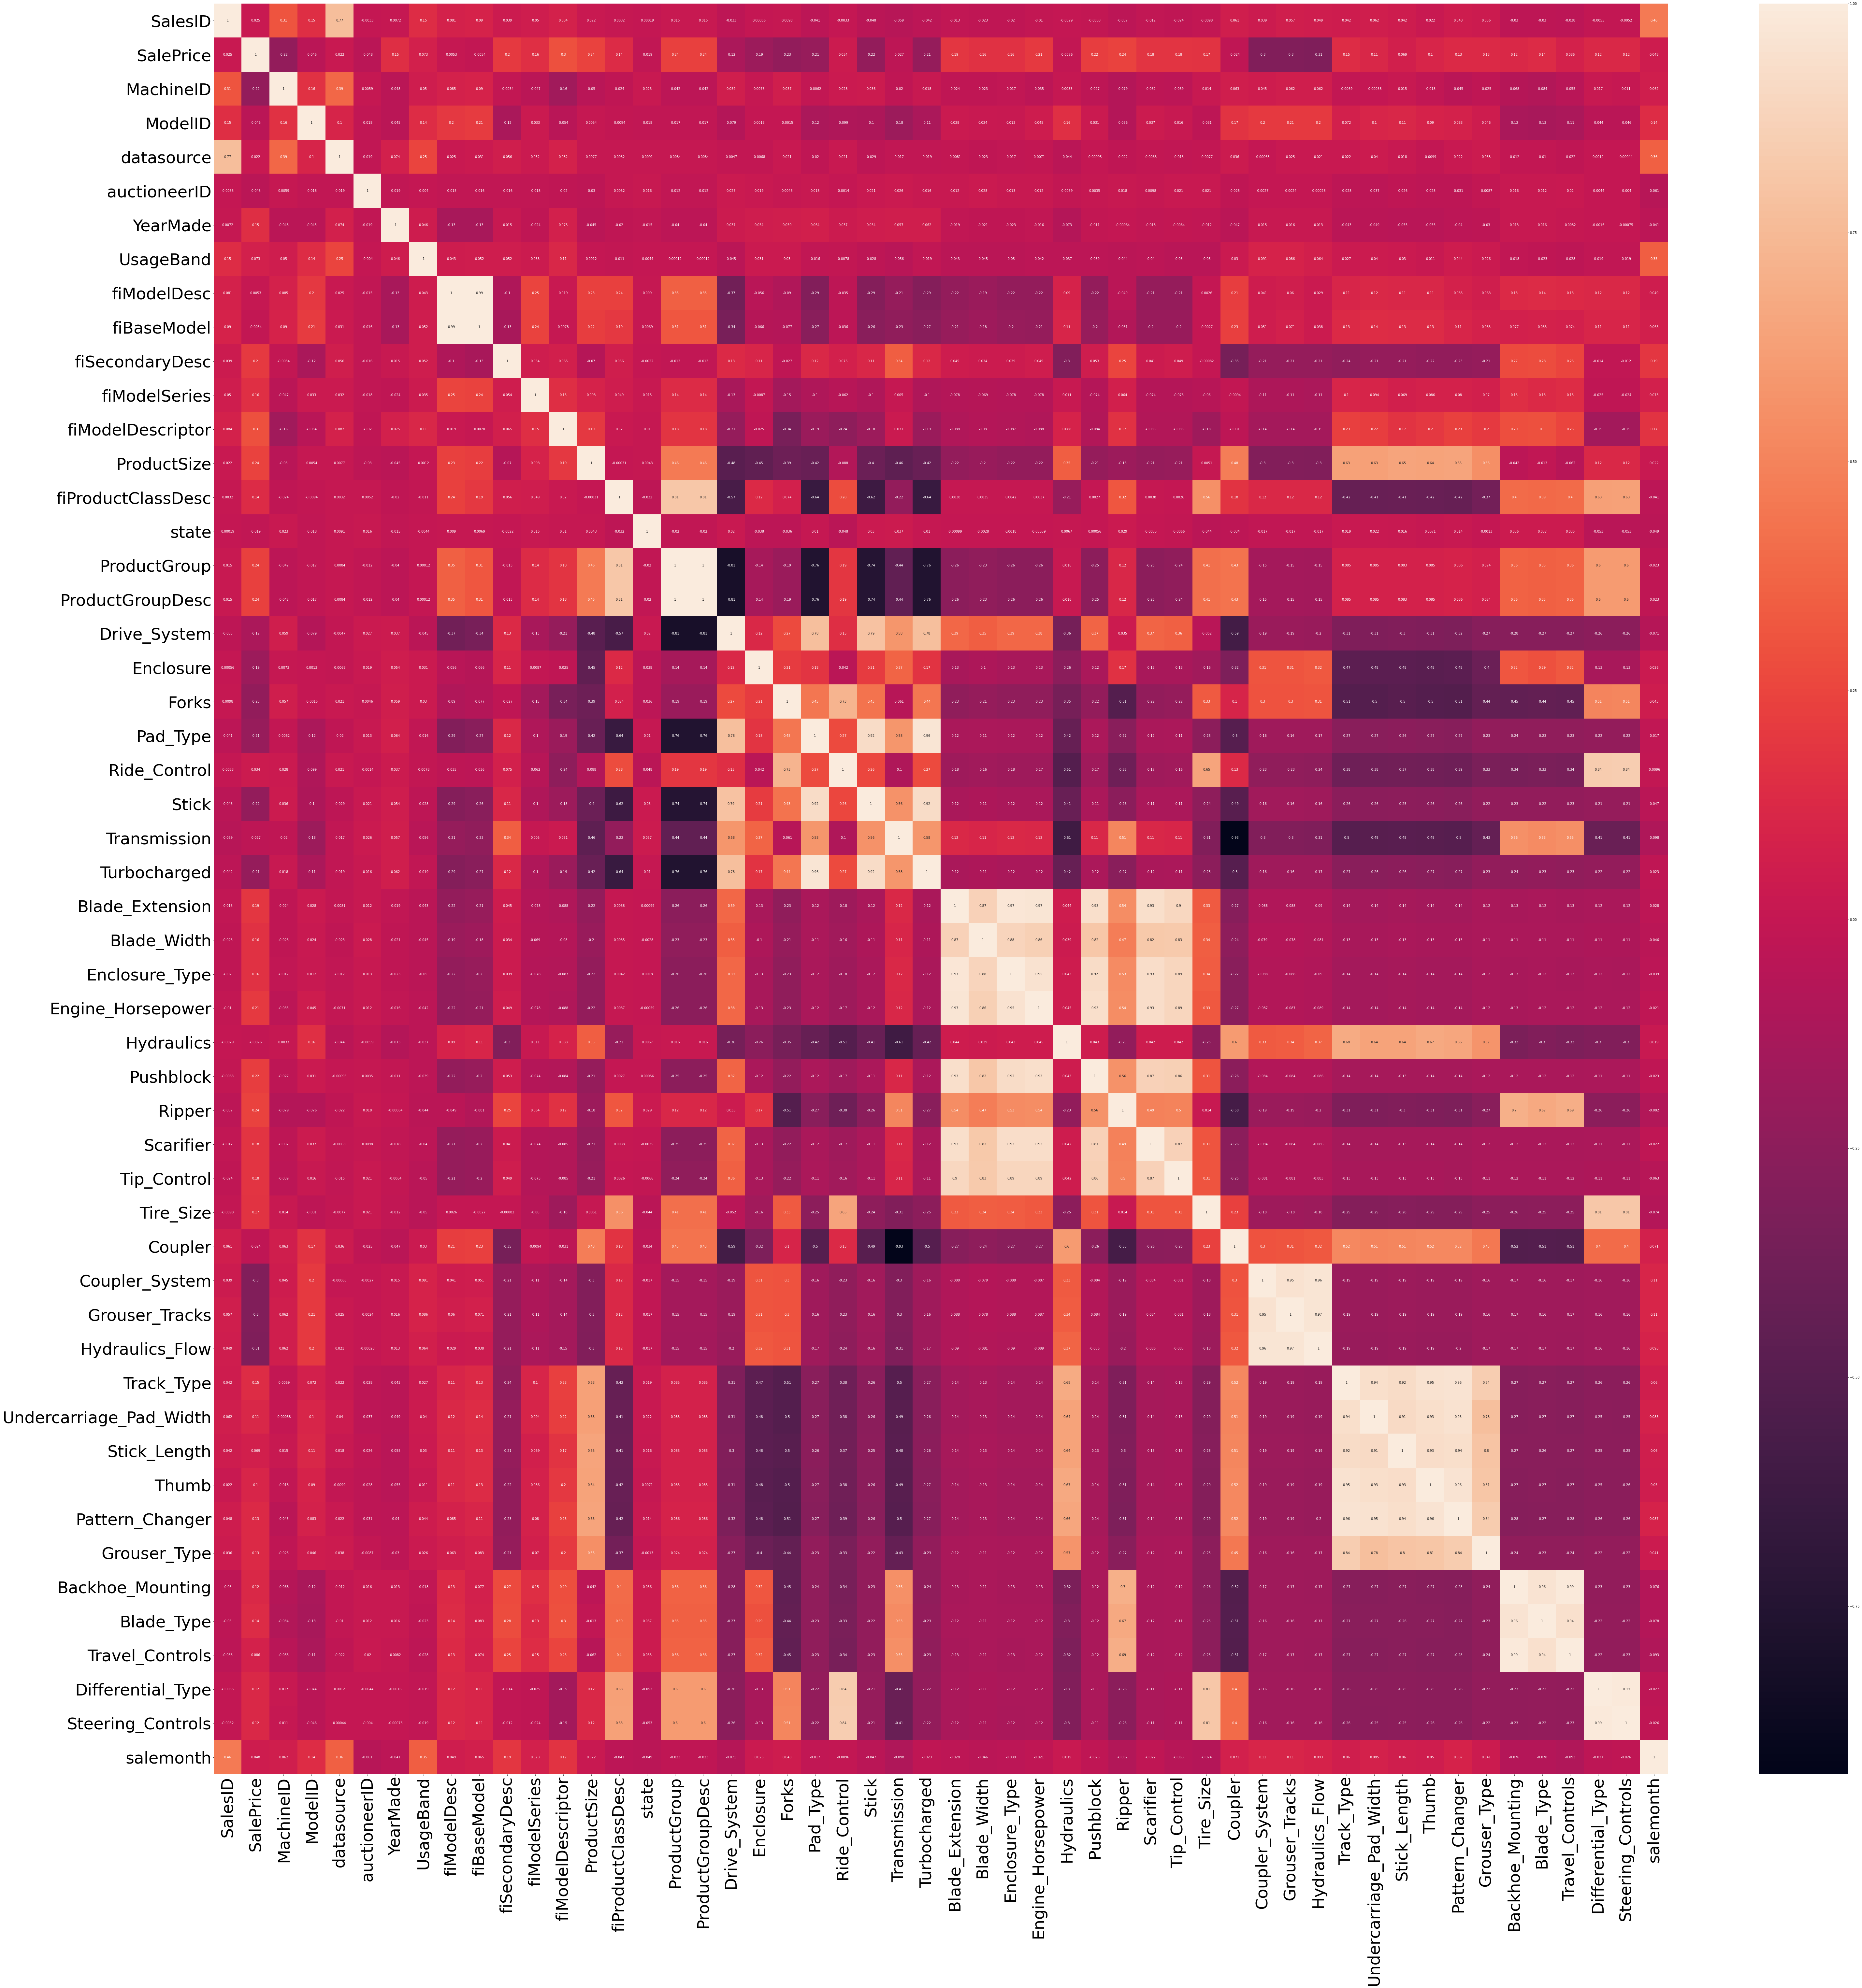

In [34]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(), annot=True)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

## Modelling

validation set dates are from `January 1, 2012 - April 30, 2012`

Now that all missing values have been filled in and categorical values have been converted to numbers we can run a machine learning model

In [48]:
X_test = df[(df['saledate']>='2012-01-01') & (df['saledate']<='2012-04-30')].drop(['saledate','SalePrice'], axis=1)
y_test = df[(df['saledate']>='2012-01-01') & (df['saledate']<='2012-04-30')]['SalePrice']

In [55]:
X_train = df[~(df['saledate']>='2012-01-01') & (df['saledate']<='2012-04-30')].drop(['saledate','SalePrice'], axis=1)
y_train = df[~(df['saledate']>='2012-01-01') & (df['saledate']<='2012-04-30')]['SalePrice']

In [56]:
len(X_train), len(X_test)

(380989, 11573)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42).fit(X_train, y_train)

In [60]:
model.score(X_test,y_test)

0.8704461665148232

### Evaluation

In [62]:
y_preds = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [66]:
print("MAE:",mean_absolute_error(y_test, y_preds))
print("MSE:",mean_squared_error(y_test, y_preds))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_preds)))
print("MSLE:",mean_squared_log_error(y_test, y_preds))

MAE: 6128.202048734122
MSE: 88986954.34466302
RMSE: 9433.289688367628
MSLE: 0.06313772815863015


In [64]:
df['SalePrice'].mean()

31296.220719784393

### Feature importance

In [69]:
model.feature_importances_

array([5.60621055e-02, 2.24297358e-02, 3.39853986e-02, 7.01809408e-04,
       6.79887947e-03, 2.64085900e-01, 2.50853823e-03, 2.09087101e-02,
       7.35224525e-02, 5.43191188e-02, 4.94744570e-03, 4.21111775e-03,
       2.31270252e-01, 3.79494200e-02, 1.43777587e-02, 2.84949537e-04,
       2.86990534e-04, 1.74900680e-03, 8.65799312e-03, 5.93488335e-04,
       5.79271505e-05, 7.13558017e-04, 2.19697550e-04, 1.80405433e-03,
       4.29531873e-05, 2.86550954e-03, 8.65278843e-03, 2.81586895e-03,
       1.00468296e-03, 5.15525884e-03, 3.03633096e-03, 2.76638718e-03,
       6.71997205e-03, 1.65834411e-03, 2.41331582e-03, 1.47319168e-03,
       2.95269352e-02, 7.90268224e-06, 6.44469423e-06, 2.14440958e-04,
       1.49731063e-03, 1.86885777e-03, 9.87514376e-04, 3.23423288e-04,
       6.80960498e-04, 3.69514365e-04, 2.37012033e-03, 1.26570555e-03,
       2.39086605e-04, 2.84626869e-04, 7.93062442e-02])

In [76]:
def plot_features(columns, importances, n=20):
    d = (pd.DataFrame({"features":columns,
                       "feature_importances":importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(d['features'][:n], d['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importances')
    ax.invert_yaxis()

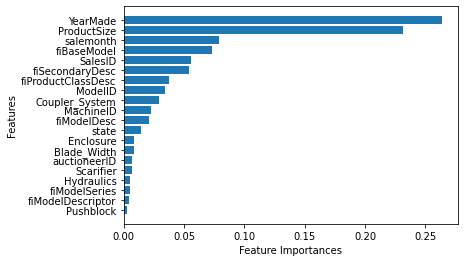

In [77]:
plot_features(X_train.columns, model.feature_importances_)